In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | hofn
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kalmunai
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | nisia floresta
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | finnsnes
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | otacilio costa
Processing Record 23 of Set 1 | fairbanks
Processing R

Processing Record 34 of Set 4 | lolua
City not found. Skipping...
Processing Record 35 of Set 4 | daru
Processing Record 36 of Set 4 | tommot
Processing Record 37 of Set 4 | mar del plata
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | orange cove
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | beyneu
Processing Record 42 of Set 4 | sorland
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | vostok
Processing Record 45 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | chany
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | shelburne
Processing Record 50 of Set 4 | catamarca
Processing Record 1 of Set 5 | druzhba
Processing Record 2 of Set 5 | beesel
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | hirara
Processing Record 5 of Set 5 | borba
Processing Record 6 of Set 5 | odweyne
Processi

Processing Record 27 of Set 8 | cam pha
City not found. Skipping...
Processing Record 28 of Set 8 | puga
Processing Record 29 of Set 8 | la sarre
Processing Record 30 of Set 8 | kyzyl-suu
Processing Record 31 of Set 8 | melfi
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | trairi
Processing Record 34 of Set 8 | celestun
Processing Record 35 of Set 8 | fort nelson
Processing Record 36 of Set 8 | tarakan
Processing Record 37 of Set 8 | katobu
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | yerbogachen
Processing Record 40 of Set 8 | sens
Processing Record 41 of Set 8 | mnogovershinnyy
Processing Record 42 of Set 8 | innisfail
Processing Record 43 of Set 8 | waingapu
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | lebedinyy
Processing Record 46 of Set 8 | krikellos
Processing Record 47 of Set 8 | nome
Processing Record 48 of Set 8 | kony
Processing Record 49 of Set 8 | opuwo
Processing Record 50 of Set 8 | leh
Processing R

Processing Record 18 of Set 12 | batemans bay
Processing Record 19 of Set 12 | lasem
Processing Record 20 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 12 | moose factory
Processing Record 22 of Set 12 | marijampole
Processing Record 23 of Set 12 | aketi
Processing Record 24 of Set 12 | clyde river
Processing Record 25 of Set 12 | cayenne
Processing Record 26 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 12 | isla mujeres
Processing Record 28 of Set 12 | plouzane
Processing Record 29 of Set 12 | atasu
Processing Record 30 of Set 12 | tvoroyri
Processing Record 31 of Set 12 | quixeramobim
Processing Record 32 of Set 12 | derzhavinsk
Processing Record 33 of Set 12 | noyon
Processing Record 34 of Set 12 | shenjiamen
Processing Record 35 of Set 12 | muli
Processing Record 36 of Set 12 | carmo do rio claro
Processing Record 37 of Set 12 | capitan bado
Processing Record 38 of Set 12 | karratha
Processing Record 39 of

In [10]:
print(len(city_data))

568


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)

In [12]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,17.71,52,75,5.01,US,2022-01-30 17:04:25
1,Ushuaia,-54.8000,-68.3000,47.86,66,75,25.32,AR,2022-01-30 17:03:52
2,Bluff,-46.6000,168.3333,58.80,92,85,2.48,NZ,2022-01-30 17:04:26
3,Hofn,64.2539,-15.2082,30.20,48,80,20.54,IS,2022-01-30 17:04:26
4,Mataura,-46.1927,168.8643,58.48,99,48,1.90,NZ,2022-01-30 17:04:26
5,Kalmunai,7.4167,81.8167,77.43,87,26,7.27,LK,2022-01-30 17:04:27
6,Khatanga,71.9667,102.5000,-9.72,98,98,9.40,RU,2022-01-30 17:04:27
7,Chuy,-33.6971,-53.4616,79.66,55,99,12.64,UY,2022-01-30 17:00:00
8,Pisco,-13.7000,-76.2167,75.02,73,0,10.36,PE,2022-01-30 17:04:27
9,Nisia Floresta,-6.0911,-35.2086,88.61,57,70,14.36,BR,2022-01-30 17:04:28


In [13]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-01-30 17:04:25,42.0970,-79.2353,17.71,52,75,5.01
1,Ushuaia,AR,2022-01-30 17:03:52,-54.8000,-68.3000,47.86,66,75,25.32
2,Bluff,NZ,2022-01-30 17:04:26,-46.6000,168.3333,58.80,92,85,2.48
3,Hofn,IS,2022-01-30 17:04:26,64.2539,-15.2082,30.20,48,80,20.54
4,Mataura,NZ,2022-01-30 17:04:26,-46.1927,168.8643,58.48,99,48,1.90
5,Kalmunai,LK,2022-01-30 17:04:27,7.4167,81.8167,77.43,87,26,7.27
6,Khatanga,RU,2022-01-30 17:04:27,71.9667,102.5000,-9.72,98,98,9.40
7,Chuy,UY,2022-01-30 17:00:00,-33.6971,-53.4616,79.66,55,99,12.64
8,Pisco,PE,2022-01-30 17:04:27,-13.7000,-76.2167,75.02,73,0,10.36
9,Nisia Floresta,BR,2022-01-30 17:04:28,-6.0911,-35.2086,88.61,57,70,14.36


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

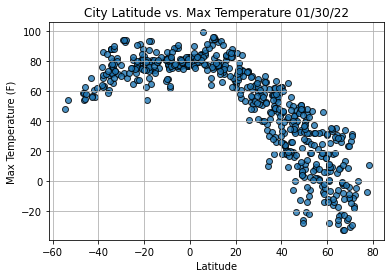

In [18]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

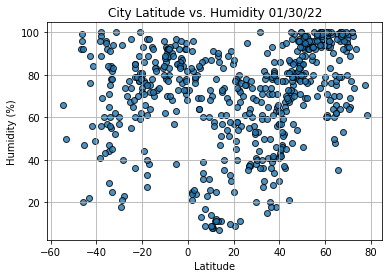

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

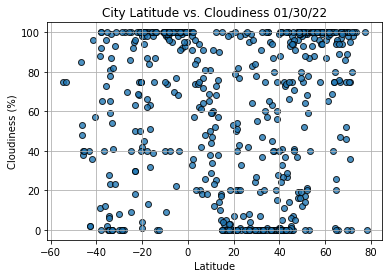

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

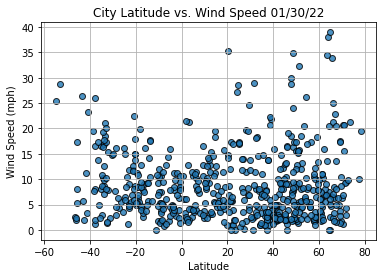

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linerregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Locate index 13 in city_data_df
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-01-30 17:04:29
Lat                        -33.65
Lng                      115.3333
Max Temp                    65.08
Humidity                       78
Cloudiness                      0
Wind Speed                  18.52
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
563     True
564     True
565    False
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-01-30 17:04:25,42.0970,-79.2353,17.71,52,75,5.01
3,Hofn,IS,2022-01-30 17:04:26,64.2539,-15.2082,30.20,48,80,20.54
5,Kalmunai,LK,2022-01-30 17:04:27,7.4167,81.8167,77.43,87,26,7.27
6,Khatanga,RU,2022-01-30 17:04:27,71.9667,102.5000,-9.72,98,98,9.40
10,Kavaratti,IN,2022-01-30 17:04:28,10.5669,72.6420,81.66,70,47,8.05


In [26]:
city_data_df.loc[(city_data_df["Lat"] <= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ushuaia,AR,2022-01-30 17:03:52,-54.8000,-68.3000,47.86,66,75,25.32
2,Bluff,NZ,2022-01-30 17:04:26,-46.6000,168.3333,58.80,92,85,2.48
4,Mataura,NZ,2022-01-30 17:04:26,-46.1927,168.8643,58.48,99,48,1.90
7,Chuy,UY,2022-01-30 17:00:00,-33.6971,-53.4616,79.66,55,99,12.64
8,Pisco,PE,2022-01-30 17:04:27,-13.7000,-76.2167,75.02,73,0,10.36


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

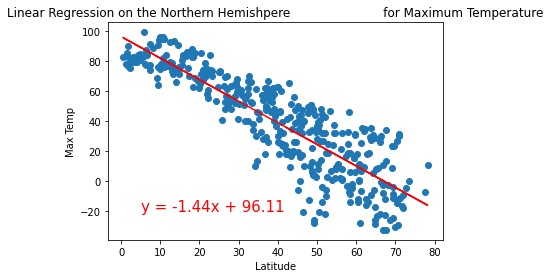

In [29]:
# Linear regression on the Northern Hemishpere for Maximum Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemishpere \
                       for Maximum Temperature', 'Max Temp', (5,-20))

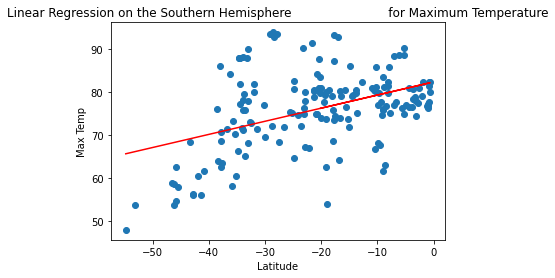

In [31]:
# Linear regression on the Southern Hemisphere for Maxumum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,45))

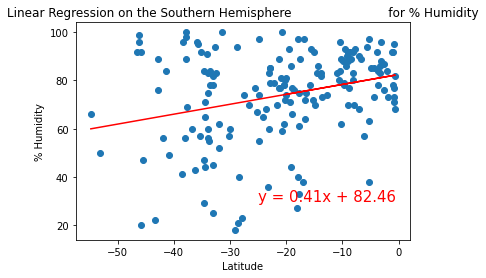

In [32]:
# Linear regression on the Southern Hemisphere for % Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,30))

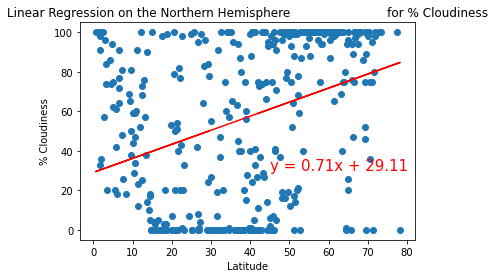

In [33]:
# Linear regression on the Northern Hemisphere for Cloudiness Percentage
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,30))

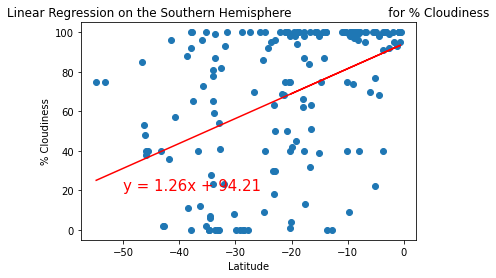

In [34]:
# Linear regression on the Southern Hemisphere for Cloudiness Percentage
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

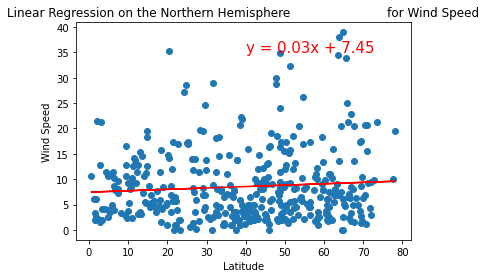

In [35]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

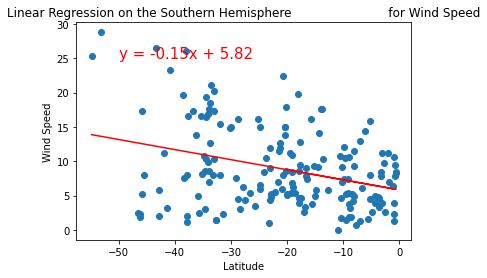

In [36]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))